In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('airbnb_nyc_train.csv')
test = pd.read_csv('airbnb_nyc_test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37696 entries, 0 to 37695
Data columns (total 10 columns):
neighbourhood_group               37696 non-null object
neighbourhood                     37696 non-null object
room_type                         37696 non-null object
minimum_nights                    37696 non-null int64
number_of_reviews                 37696 non-null int64
reviews_per_month                 30117 non-null float64
calculated_host_listings_count    37696 non-null int64
availability_365                  37696 non-null int64
has_review                        37696 non-null int64
price                             37696 non-null int64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.9+ MB


In [4]:
train = train.drop(['reviews_per_month'], axis=1)
test = test.drop(['reviews_per_month'], axis=1)

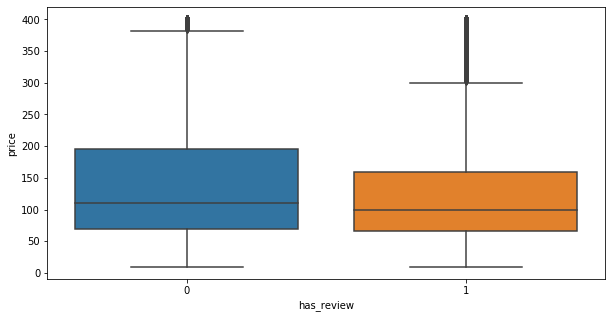

In [32]:
plt.figure(figsize=(10, 5))
g = sns.boxplot(x='has_review', y='price', data=train)
plt.savefig("./Figure/review_price.png")

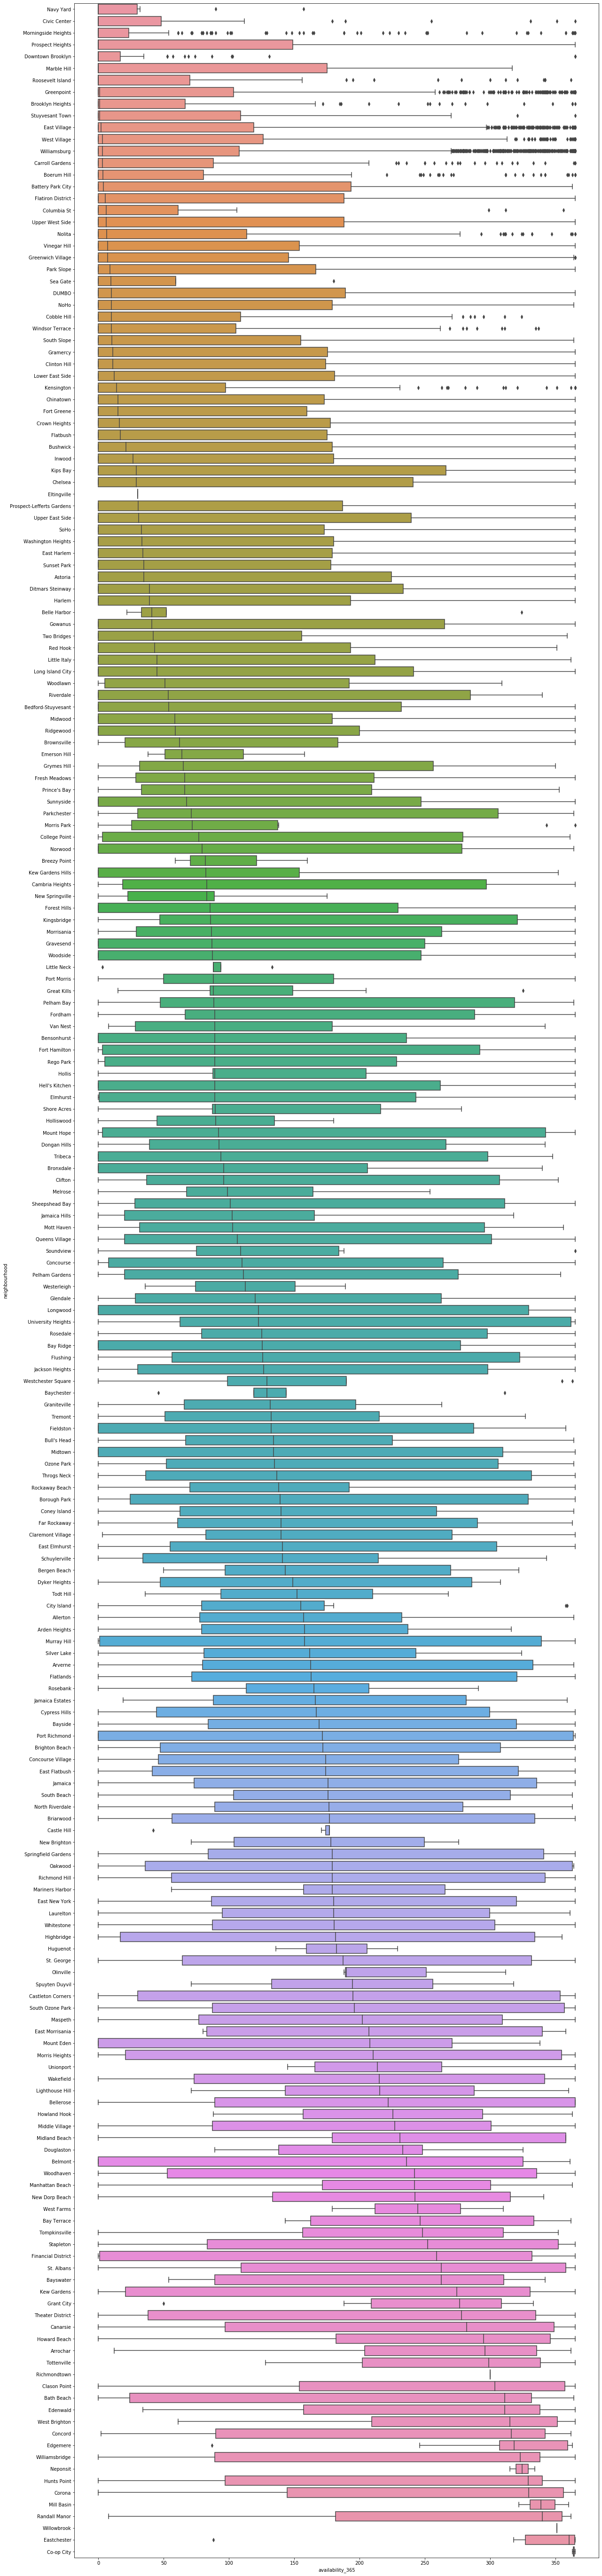

In [33]:
plt.figure(figsize=(20, 100))
my_order = train.groupby(by=["neighbourhood"])["availability_365"].median().sort_values(ascending = True).index
# sns.boxplot(y=data['neighbourhood'], x=data['price'], order=my_order)
g = sns.boxplot(x='availability_365', y='neighbourhood', data=train, order=my_order)
plt.savefig("./Figure/availbility_neighborhood.png")

In [7]:
def map_availability(x):
    if x.availability_365 <= 50:
        return 0
    elif x.availability_365 <= 100:
        return 1
    elif x.availability_365 <= 150:
        return 2
    elif x.availability_365 <= 200:
        return 3
    elif x.availability_365 <= 250:
        return 4
    elif x.availability_365 <= 300:
        return 5
    else:
        return 6
train['maped_availability'] = train.apply(map_availability, axis=1)

In [8]:
def map_neighbourhood(x):
    if x.price <= 50:
        return 0
    elif x.price <= 100:
        return 1
    elif x.price <= 150:
        return 2
    elif x.price <= 200:
        return 3
    elif x.price <= 250:
        return 4
    elif x.price <= 300:
        return 5
    else:
        return 6
train['maped_loc'] = train.apply(map_neighbourhood, axis=1)

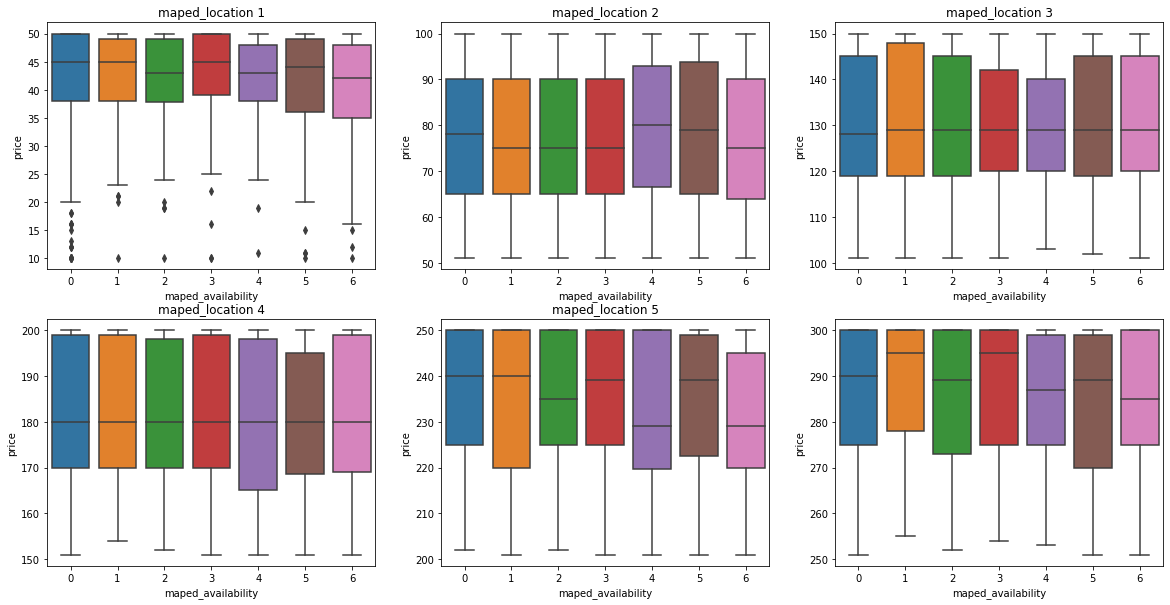

In [34]:
plt.figure(figsize=(20, 10))
for i in range(0,6):
    plt.title('maped_location '+str(i))
    plt.subplot(2, 3, i+1)
    temp = train[train.maped_loc == i]
    g = sns.boxplot(x='maped_availability', y='price', data=temp)
plt.savefig("./Figure/location_price.png")

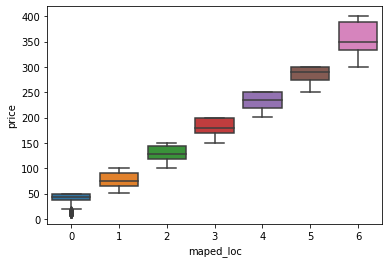

In [35]:
g = sns.boxplot(x='maped_loc', y='price', data=train)
plt.savefig("./Figure/price_map_loc.png")

In [11]:
test['maped_loc'] = test.apply(map_neighbourhood, axis=1)

In [12]:
test['maped_availability'] = test.apply(map_availability, axis=1)

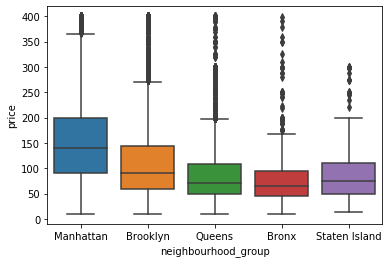

In [13]:
g = sns.boxplot(x='neighbourhood_group', y='price', data=train)

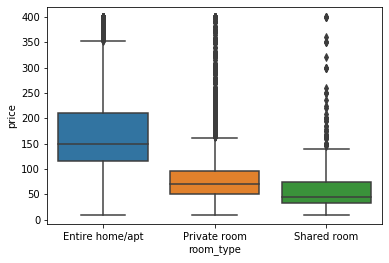

In [36]:
g = sns.boxplot(x='room_type', y='price', data=train)
plt.savefig("./Figure/roomt_type_price.png")

In [15]:
train['maped_room_type'] = train['room_type'].map({'Entire home/apt':0, 'Private room':1, 'Shared room':1})
test['maped_room_type'] = test['room_type'].map({'Entire home/apt':0, 'Private room':1, 'Shared room':1})


In [16]:
train['minimum_nights'].describe()

count    37696.000000
mean         7.025891
std         20.347440
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

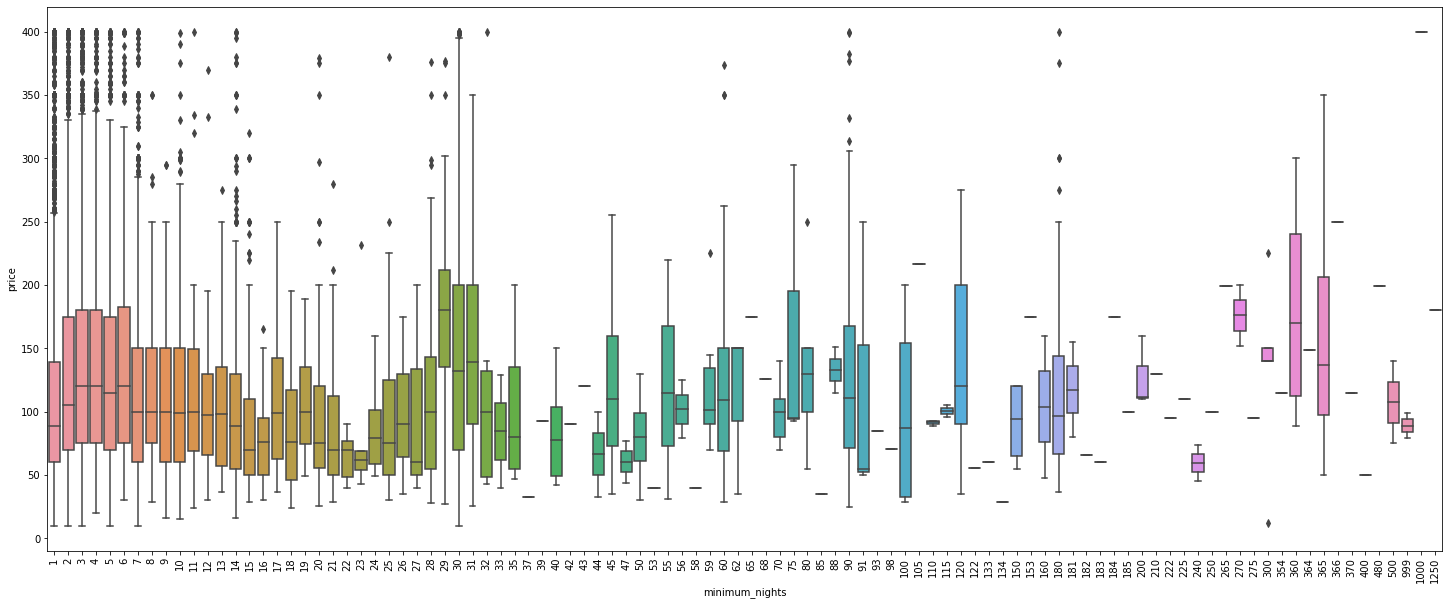

In [37]:
plt.figure(figsize=(25, 10))
# my_order = train.groupby(by=["minimum_nights"])["price"].median().sort_values(ascending = False).index
g = sns.boxplot(x=train['minimum_nights'], y=train['price'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.savefig("./Figure/not_use_min_nights_price.png")

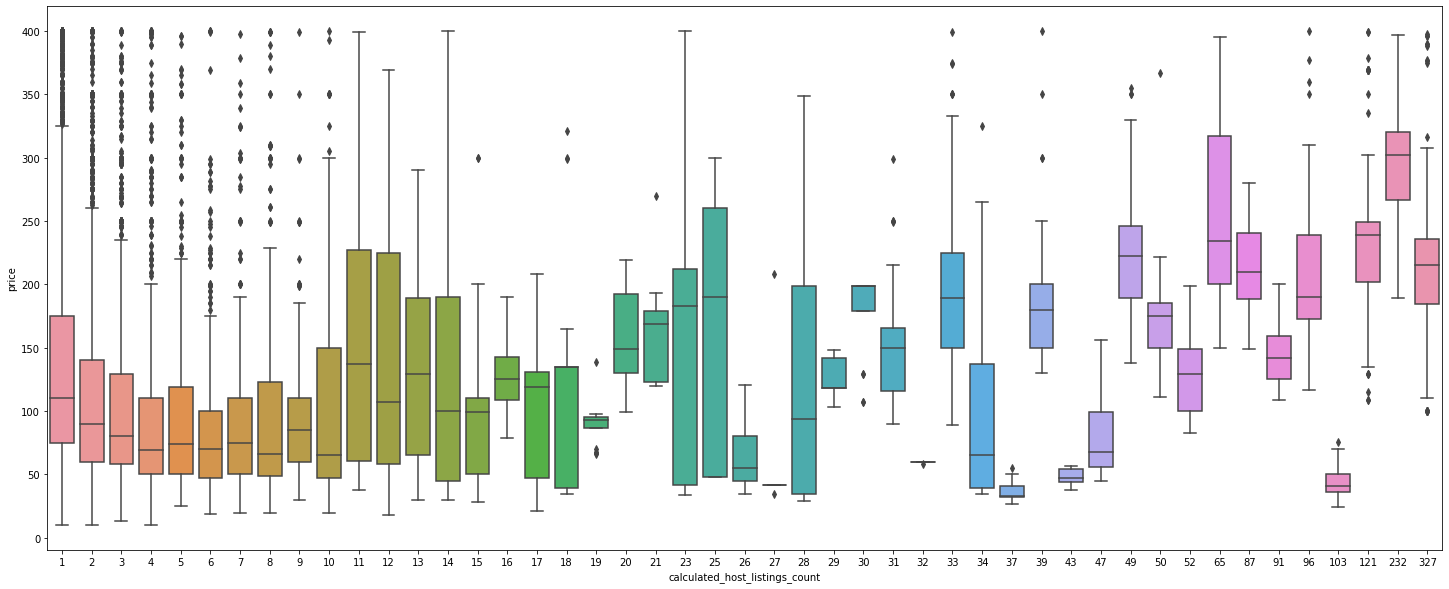

In [38]:
plt.figure(figsize=(25, 10))
g = sns.boxplot(x='calculated_host_listings_count', y='price', data=train)
plt.savefig("./Figure/not_use_host_listing_price.png")

In [19]:
X_train = train.iloc[:,-2:]
y_train = train['price']
X_test = test.iloc[:,-2:]
y_test = test['price']

In [20]:
X_train = train.iloc[:,-8:]
y_train = train['price']
X_test = test.iloc[:,-8:]
y_test = test['price']

In [21]:
X_train = X_train.drop(['price'], axis=1)
X_test = X_test.drop(['price'], axis=1)

In [22]:
np.log(y_train)

0        4.744932
1        4.595120
2        5.298317
3        5.402677
4        5.556828
           ...   
37691    4.553877
37692    3.688879
37693    4.941642
37694    3.465736
37695    4.499810
Name: price, Length: 37696, dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train, y_train)

print(sqrt(mean_squared_error(np.log(y_train), np.log(linear_reg.predict(X_train)))))
print(sqrt(mean_squared_error(np.log(y_test), np.log(linear_reg.predict(X_test)))))

0.20468879897758988
1.2123074814053456


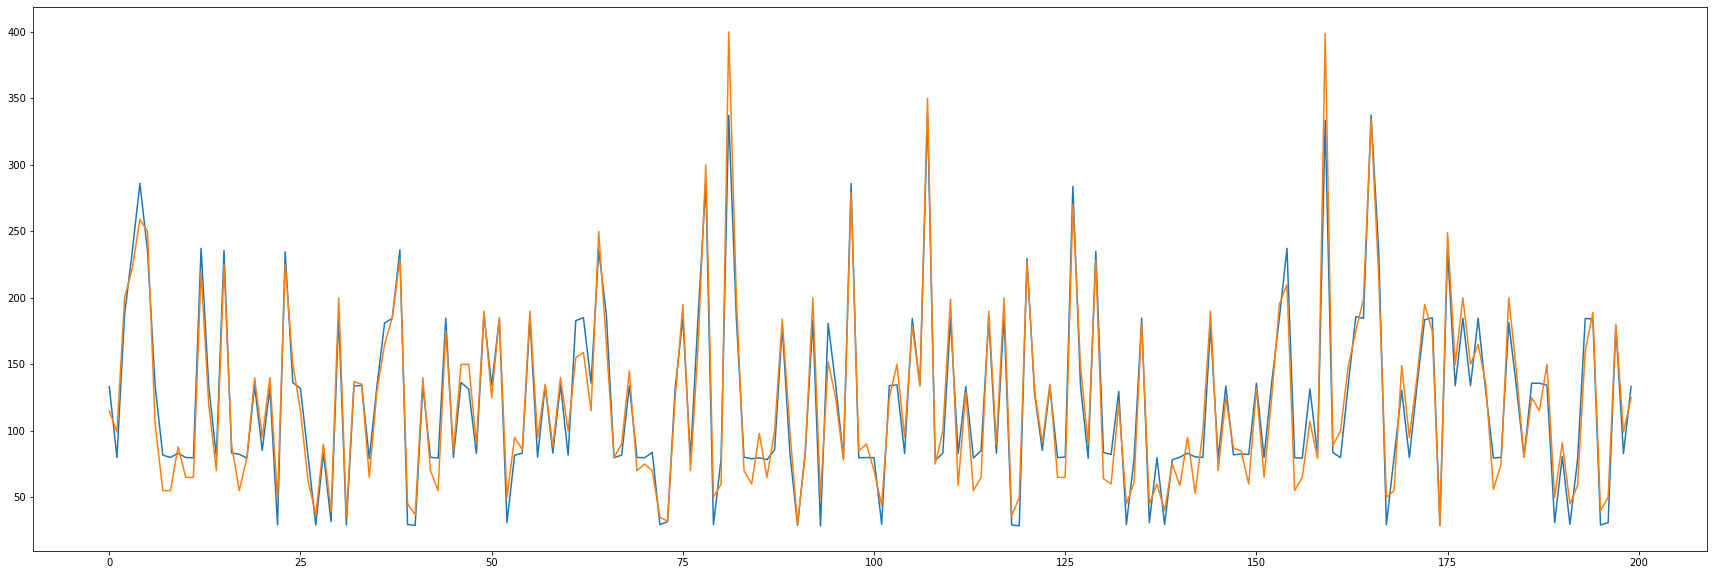

In [24]:
plt.figure(figsize=(30,10))
plt.plot(linear_reg.predict(X_train)[:200])
plt.plot(y_train[:200])

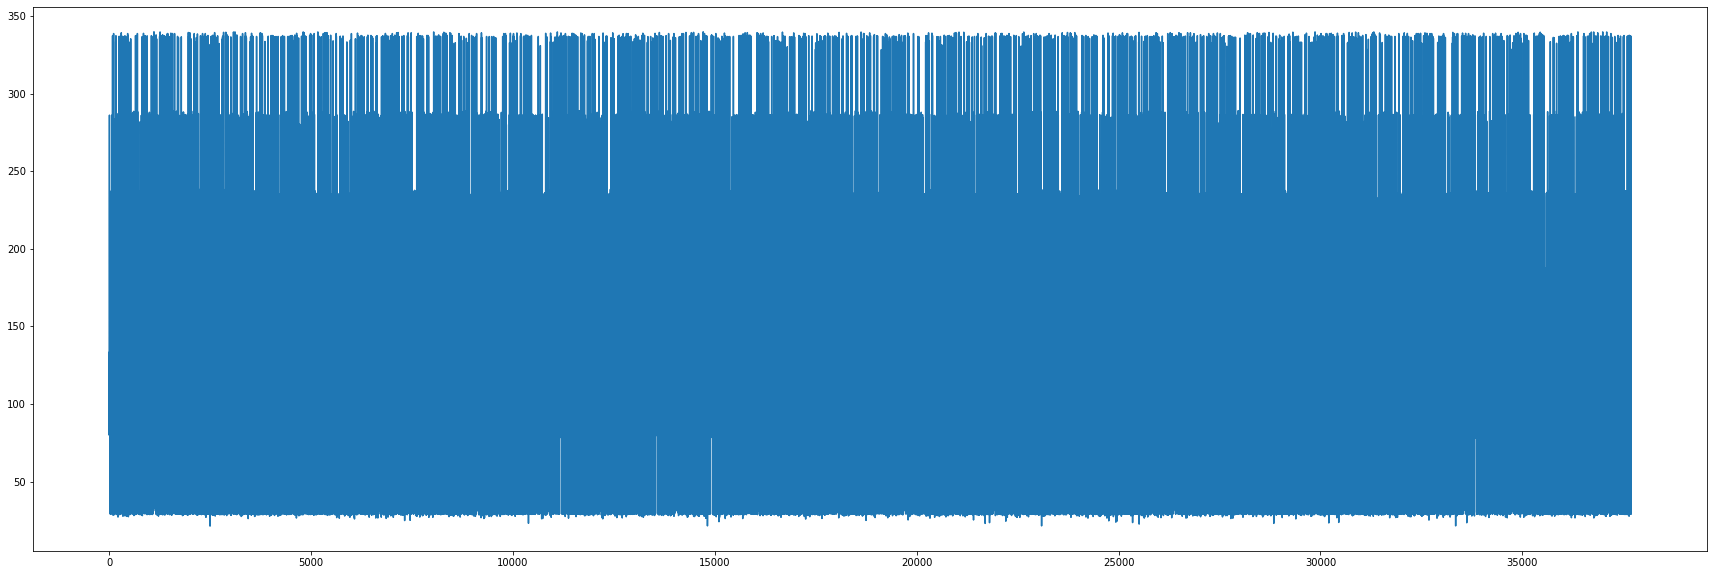

In [25]:
plt.figure(figsize=(30,10))
plt.plot(linear_reg.predict(X_train))

In [26]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=0.5).fit(X_train, y_train)

print(sqrt(mean_squared_error(y_train, ridge_reg.predict(X_train))))
print(sqrt(mean_squared_error(y_test, ridge_reg.predict(X_test))))
ridge_reg.score(X_train, y_train), ridge_reg.score(X_test, y_test)

16.244625032198886
139.22977027552727


(0.9567755935244737, -2.1664264774172755)

In [27]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.001).fit(X_train, y_train)

print(sqrt(mean_squared_error(y_train, lasso_reg.predict(X_train))))
print(sqrt(mean_squared_error(y_test, lasso_reg.predict(X_test))))
lasso_reg.score(X_train, y_train), lasso_reg.score(X_test, y_test)

16.244625861999406
139.19514370468167


(0.9567755891085349, -2.1648516869620873)

In [28]:
from sklearn import linear_model
bayesian_reg = linear_model.BayesianRidge().fit(X_train, y_train)
bayesian_reg.score(X_train, y_train), bayesian_reg.score(X_test, y_test)

(0.9567755934796771, -2.1664051717750525)

In [29]:
from sklearn import linear_model
sdg_clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3).fit(X_train, y_train)
sdg_clf.score(X_train, y_train), sdg_clf.score(X_test, y_test)

(-1.6598534207003014e+20, -1.7284013033058134e+20)

In [39]:
from sklearn import svm
svm_clf = svm.SVR().fit(X_train, y_train)

print(sqrt(mean_squared_error(y_train, svm_clf.predict(X_train))))
print(sqrt(mean_squared_error(y_test, svm_clf.predict(X_test))))
svm_clf.score(X_train, y_train), svm_clf.score(X_test, y_test)

/home/mavericku/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


64.1710743452566
78.80220973853676


(0.3254901800514627, -0.014336345240550052)

In [40]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=600).fit(X_train, y_train)

print(sqrt(mean_squared_error(y_train, neigh.predict(X_train))))
print(sqrt(mean_squared_error(y_test, neigh.predict(X_test))))
neigh.score(X_train, y_train), neigh.score(X_test, y_test)

62.95418151540141
84.12118136154854


(0.3508294342594648, -0.15588844290457748)

In [41]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor().fit(X_train, y_train)

print(sqrt(mean_squared_error(y_train, mlp.predict(X_train))))
print(sqrt(mean_squared_error(y_test, mlp.predict(X_test))))
mlp.score(X_train, y_train), mlp.score(X_test, y_test)

14.86148768327893
139.49842246520512


(0.9638228602072296, -2.178657886142719)

In [ ]:
from sklearn.ensemble import VotingRegressor
svm_clf = svm.SVR()
neigh = KNeighborsRegressor(n_neighbors=600)
mlp = MLPRegressor()
ereg = VotingRegressor(estimators=[('svm', svm_clf), ('neigh', neigh), ('mlp', mlp)]).fit(X_train, y_train)

print(sqrt(mean_squared_error(y_train, ereg.predict(X_train))))
print(sqrt(mean_squared_error(y_test, ereg.predict(X_test))))
ereg.score(X_train, y_train), ereg.score(X_test, y_test)


/home/mavericku/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
